# Exercise 6 - Breast Cancer Dataset 

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [4]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/JoycelineAS/DATASET_DATAMINING/refs/heads/main/breast-cancer.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [5]:
# 2
df.info()

# Conclusion
# Dataset memiliki 569 entri dan 32 kolom tanpa nilai kosong

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

3. Show describe column and conclude what the insight is from that column

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


4. display the number of each unique value in diagnosis columns (including NaN)

In [58]:
#4
col_names = ["diagnosis"]

for col in col_names:
  print(df[col].value_counts(dropna=False))

#Dataset ini memiliki lebih banyak hasil B (hampir 2 kali lipat dari nilai M). B mewakili Benign atau non-kanker, sementara M mewakili Malignant (kanker).

B    357
M    212
Name: diagnosis, dtype: int64


5. Null handling

In [59]:
#5
df.isnull().sum()

#Conclusion
#Dataset ini tidak memiliki nilai kosong (missing values), yang berarti data lengkap untuk di analisis.

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

6. Create your own insightful visualization and explain it in at least 2 sentences

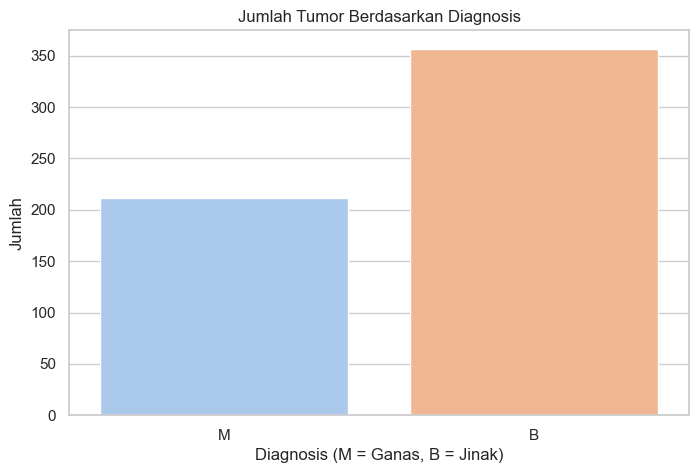

In [18]:
#6
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='diagnosis', palette='pastel')
plt.title('Jumlah Tumor Berdasarkan Diagnosis')
plt.xlabel('Diagnosis (M = Ganas, B = Jinak)')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

#Conclusion
# visualisasi tersebut menunjukkan distribusi jumlah kasus kanker payudara berdasarkan kategori diagnosis, yaitu jinak (benign) dan ganas (malignant)

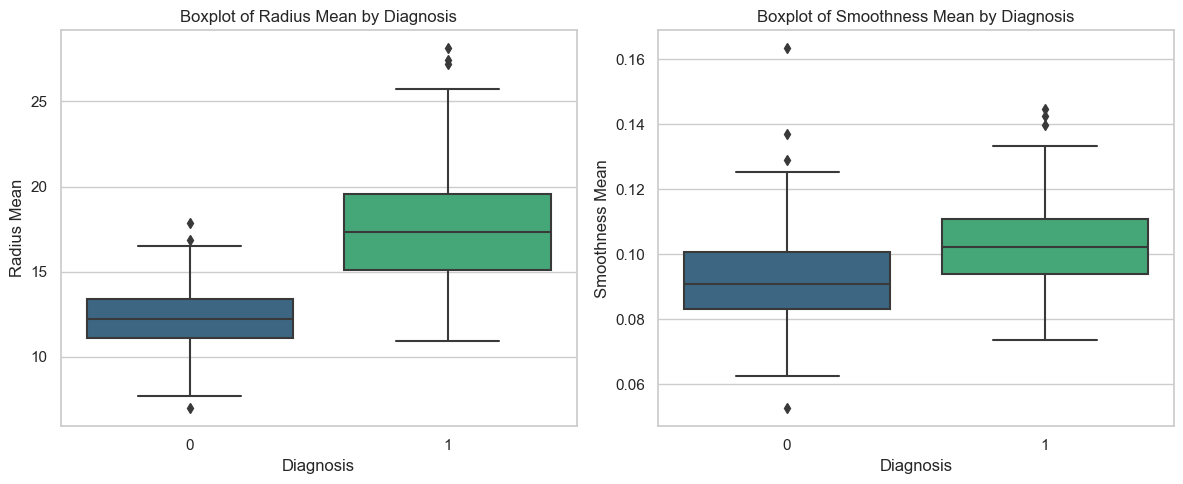

In [62]:
plt.figure(figsize=(12, 5))

# Boxplot untuk Radius Mean
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='diagnosis', y='radius_mean', palette='viridis')
plt.title('Boxplot of Radius Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')

# Boxplot untuk Smoothness Mean
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='diagnosis', y='smoothness_mean', palette='viridis')
plt.title('Boxplot of Smoothness Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Smoothness Mean')

plt.tight_layout()
plt.show()

#Conclusion
#Dari boxplot, dapat disimpulkan bahwa radius_mean lebih tinggi pada diagnosis ganas, sehingga lebih relevan untuk membedakan antara diagnosis ganas dan jinak. Sebaliknya, smoothness_mean tidak menunjukkan perbedaan signifikan antara kedua diagnosis.

In [60]:
label_encoder = LabelEncoder()

df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

df.sample(n = 5)
     

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
546,922577,0,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
462,9113156,0,14.40,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.017370,...,15.40,31.98,100.40,734.6,0.1017,0.14600,0.14720,0.05563,0.2345,0.06464
194,87556202,1,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.088780,...,16.08,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,...,15.09,40.68,97.65,711.4,0.1853,1.05800,1.10500,0.22100,0.4366,0.20750
166,87127,0,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.016980,...,11.60,12.02,73.66,414.0,0.1436,0.12570,0.10470,0.04603,0.2090,0.07699


8. create a heatmap to see the correlation and explain the conclusion

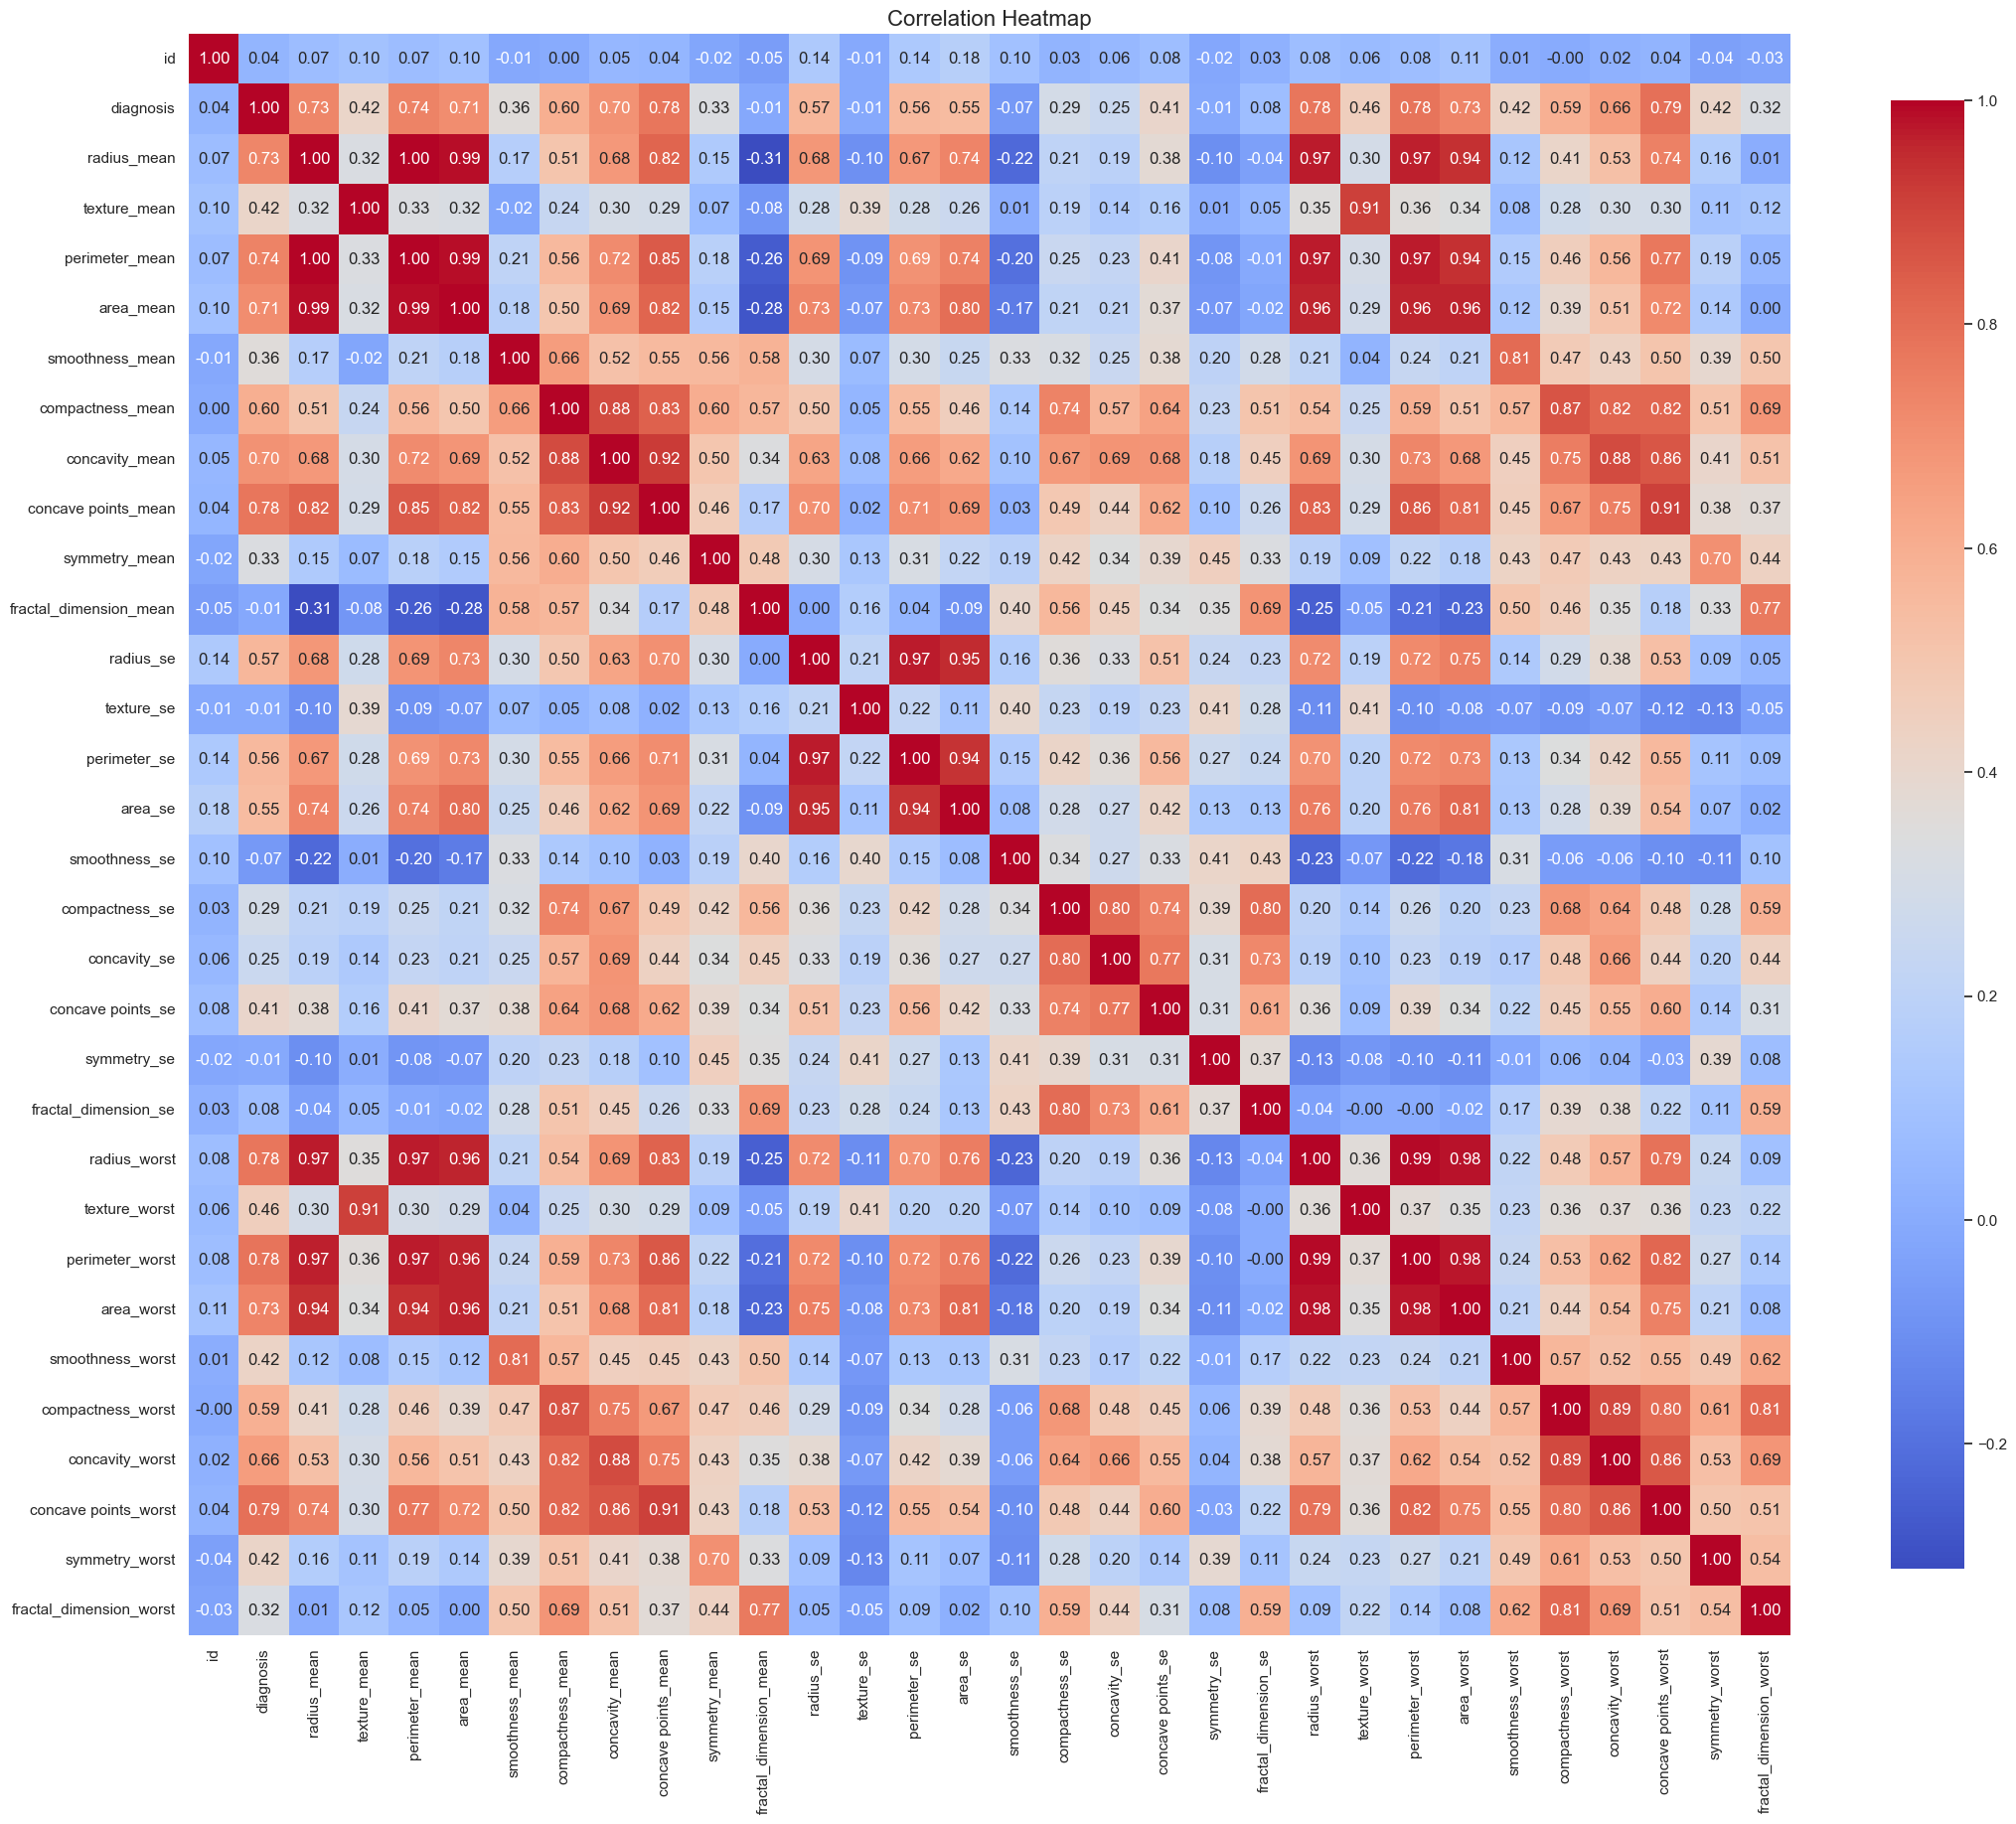

In [110]:
#8
correlation_matrix = df.corr()

plt.figure(figsize=(26, 24))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


#Conclusion
# heatmap korelasi menunjukkan adanya hubungan linear antara beberapa fitur, seperti antara radius_mean dan area_mean yang memiliki korelasi positif tinggi

## Machine Learning

1. Splitting X and y

In [63]:
#1
X = df.drop(['diagnosis', 'id'], axis = 1)
y = df['diagnosis']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [64]:
#2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (455, 30)
X_test shape: (114, 30)


In [65]:
#3
X_train.shape, X_test.shape

((455, 30), (114, 30))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [66]:
#a
from sklearn.tree import DecisionTreeClassifier

model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [67]:
#b
y_pred_entropy = model_entropy.predict(X_test)

In [68]:
#c
from sklearn.metrics import accuracy_score

y_pred_entropy = model_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy) * 100

print(f"Model accuracy score with criterion entropy: {accuracy_entropy:.2f}%")


Model accuracy score with criterion entropy: 95.61%


In [69]:
#d
train_accuracy = model_entropy.score(X_train, y_train)
test_accuracy = model_entropy.score(X_test, y_test)

print(f"Training set score: {train_accuracy:.4f}")
print(f"Test set score: {test_accuracy:.4f}")


Training set score: 0.9802
Test set score: 0.9561


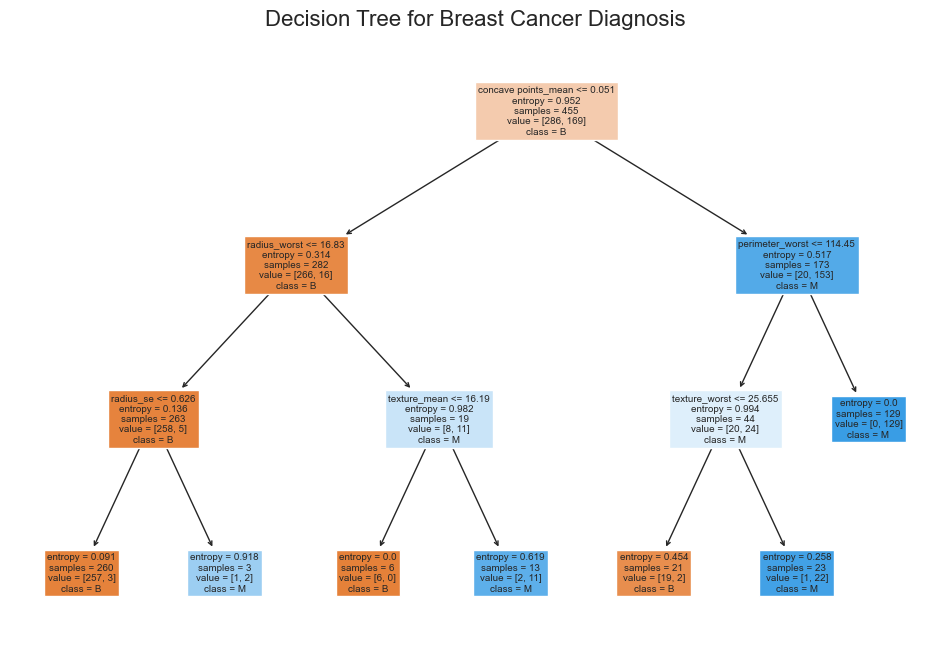

In [74]:
#e
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(model_entropy, feature_names=X.columns.tolist(), class_names=["B", "M"], filled=True)
plt.title('Decision Tree for Breast Cancer Diagnosis', fontsize=16)
plt.show()
    

2. Criterion Gini index

In [75]:
#a
from sklearn.tree import DecisionTreeClassifier

model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [76]:
#b
y_pred_gini = model_gini.predict(X_test)

In [78]:
#c
from sklearn.metrics import accuracy_score

y_pred_gini = model_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini) * 100

print(f"Model accuracy score with criterion gini index: {accuracy_gini:.2f}%")

Model accuracy score with criterion gini index: 93.86%


In [79]:
#d
train_accuracy = model_gini.score(X_train, y_train)
test_accuracy = model_gini.score(X_test, y_test)

print(f"Training set score: {train_accuracy:.4f}")
print(f"Test set score: {test_accuracy:.4f}")

Training set score: 0.9780
Test set score: 0.9386


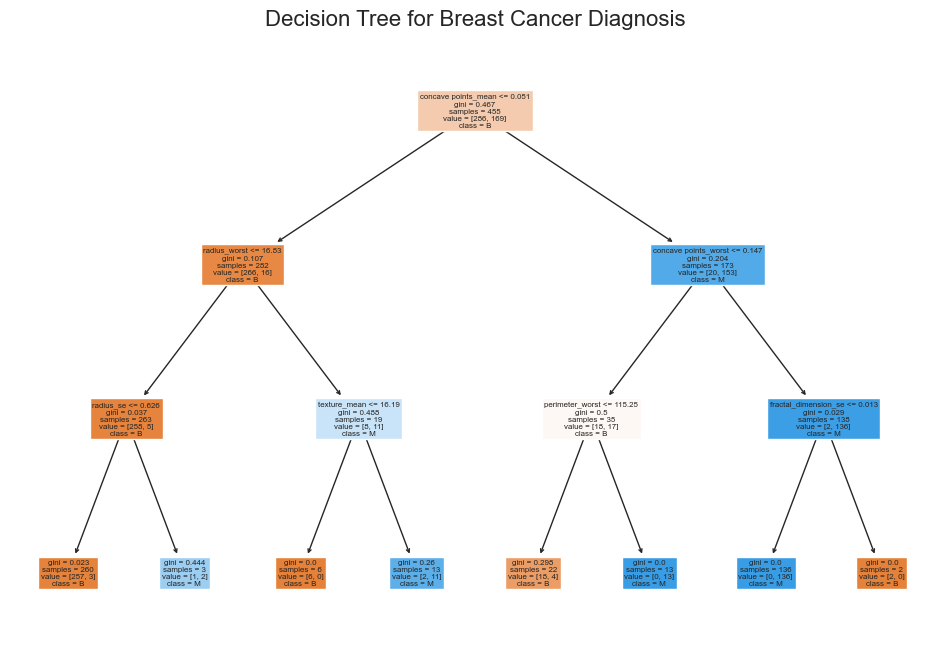

In [81]:
#e
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
tree.plot_tree(model_gini, feature_names=X.columns.tolist(), class_names=['B', 'M'], filled=True)
plt.title('Decision Tree for Breast Cancer Diagnosis', fontsize=16)
plt.show()


3. Confusion matrix and classification report of criterion Entropy and Gini index

In [82]:
#f
from sklearn.metrics import confusion_matrix

cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix Entropy:\n", cm_entropy)

cm_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix Gini Index:\n", cm_gini)

#Conclusion
#menampilkan hasil Confusion Matrix gini index

Confusion Matrix Entropy:
 [[70  1]
 [ 4 39]]
Confusion Matrix Gini Index:
 [[68  3]
 [ 4 39]]


In [83]:
#g
from sklearn.metrics import classification_report

print("Classification Report (Entropy):\n")
print(classification_report(y_test, y_pred_entropy))

print("Classification Report (Gini Index):\n")
print(classification_report(y_test, y_pred_gini))

#Conclusion
#Laporan klasifikasi untuk model Entropy menunjukkan akurasi sebesar 96% dengan presisi dan recall yang tinggi untuk kedua kelas, yaitu 0 (non-kanker) dan 1 (kanker). Model Gini Index juga menunjukkan performa yang baik, dengan akurasi 94% dan nilai presisi serta recall yang hampir sebanding untuk kedua kelas. Secara keseluruhan, kedua model memiliki kinerja yang sangat baik dalam mengklasifikasikan data.

Classification Report (Entropy):

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification Report (Gini Index):

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [111]:
#a
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [112]:
#b
y_pred_nb = nb.predict(X_test)

#Conclusion
#menampilkan predict  X_test menggunakan the Naive Bayes Classifier model.

In [113]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_percentage = accuracy_nb * 100
print(f"Model accuracy score: {accuracy_percentage:.2f}%")

#d
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Confusion Matrix:\n", conf_matrix_nb)

#e
y_train_nb = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_nb)
training_accuracy = accuracy_score(y_train, y_train_nb)

print('Training accuracy: {0:0.4f}'.format(training_accuracy))
print('Testing accuracy: {0:0.4f}'.format(test_accuracy))

#Conclusion
#untuk menampilkan model accuracy dan confusion matrix dan juga training testingnya

Model accuracy score: 97.37%
Confusion Matrix:
 [[71  0]
 [ 3 40]]
Training accuracy: 0.9363
Testing accuracy: 0.9737


In [114]:
#e
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report:\n", class_report_nb)

#Conclusion
#Classification report dari Naive Bayes Classifier Laporan klasifikasi untuk model Naive Bayes menunjukkan akurasi sebesar 97%. Model ini mencatat presisi 96% dan recall 100% untuk kelas 0 (non-kanker), serta presisi 100% dan recall 93% untuk kelas 1 (kanker). Rata-rata makro dan rata-rata berbobot juga menunjukkan performa yang sangat baik, dengan nilai di atas 0.97. Secara keseluruhan, model Naive Bayes menunjukkan kemampuan yang tinggi dalam mengklasifikasikan data.

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Random Forest

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:
y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf) * 100

print(f'Accuracy Score: {accuracy:.2f}%')

Accuracy Score: 96.49%


In [101]:
y_train_rf = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Training accuracy: {0:0.4f}'.format(training_accuracy))
print('Testing accuracy: {0:0.4f}'.format(test_accuracy))

Training accuracy: 0.9363
Testing accuracy: 0.9649


In [105]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix:\n", conf_matrix_rf)

Confusion Matrix:
 [[70  1]
 [ 3 40]]


In [109]:
print("Classification Report Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

#Conclusion
#Laporan klasifikasi untuk model Random Forest menunjukkan akurasi sebesar 96%. Model ini mencatat presisi 96% dan recall 99% untuk kelas 0 (non-kanker), serta presisi 98% dan recall 93% untuk kelas 1 (kanker). Rata-rata makro dan rata-rata berbobot juga menunjukkan performa yang solid, dengan nilai di atas 0.96. Secara keseluruhan, model Random Forest menunjukkan kemampuan yang sangat baik dalam mengklasifikasikan data.

Classification Report Random Forest:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

